In [1]:
import math
from pathlib import Path
from datetime import datetime
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm
import random

from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, LearningRateScheduler
from tensorflow.keras.layers import Conv2D, Activation, Dense, Dropout, Softmax, LeakyReLU, BatchNormalization, AveragePooling2D, Reshape, Flatten
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy, BinaryCrossentropy, SparseCategoricalCrossentropy, MeanSquaredError
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import MobileNet


In [26]:
TRAINING_DIR = Path("dataset/train/")

training_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2)

# VALIDATION_DIR = Path("dataset/Valid/")
# validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=100,
    subset = 'training')


validation_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=50,
    subset = 'validation')
                                                    

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [3]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights ="imagenet")

In [4]:
pre_trained_model.trainable = False

In [5]:
add_model = Sequential()
add_model.add(pre_trained_model)
add_model.add(Flatten())
add_model.add(Dense(1024, activation='relu'))
add_model.add(Dropout(0.2))
add_model.add(Dense(29, activation='softmax'))
        
model = add_model

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              18875392  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 29)                29725     
Total params: 40,707,901
Trainable params: 18,905,117
Non-trainable params: 21,802,784
_________________________________________________________________


In [7]:
model.compile(optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False), 
              loss =CategoricalCrossentropy(), 
              metrics = ['accuracy'])

In [8]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 25,
            epochs = 10,
            validation_steps = 10,
            verbose = 1)

Epoch 1/10
25/25 [==============================] - 91s 4s/step - loss: 18.8648 - accuracy: 0.2092 - val_loss: 2.8297 - val_accuracy: 0.2740
Epoch 2/10
25/25 [==============================] - 93s 4s/step - loss: 1.9847 - accuracy: 0.4492 - val_loss: 2.2447 - val_accuracy: 0.3660
Epoch 3/10
25/25 [==============================] - 93s 4s/step - loss: 1.4244 - accuracy: 0.5932 - val_loss: 1.8668 - val_accuracy: 0.4640
Epoch 4/10
25/25 [==============================] - 89s 4s/step - loss: 1.2060 - accuracy: 0.6336 - val_loss: 1.7486 - val_accuracy: 0.4960
Epoch 5/10
25/25 [==============================] - 93s 4s/step - loss: 0.9610 - accuracy: 0.7104 - val_loss: 1.4187 - val_accuracy: 0.5820
Epoch 6/10
25/25 [==============================] - 96s 4s/step - loss: 0.8691 - accuracy: 0.7324 - val_loss: 1.4066 - val_accuracy: 0.5700
Epoch 7/10
25/25 [==============================] - 89s 4s/step - loss: 0.7984 - accuracy: 0.7532 - val_loss: 1.3813 - val_accuracy: 0.5800
Epoch 8/10
25/25 [=

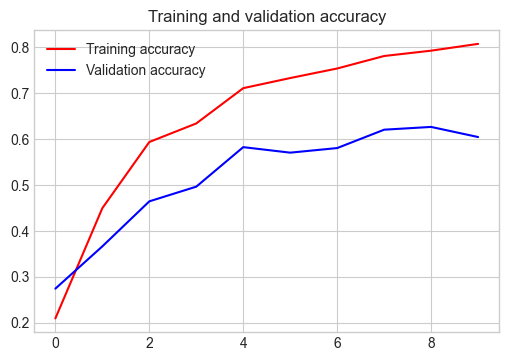

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.style.use('seaborn-whitegrid')
plt.figure(dpi = 100)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

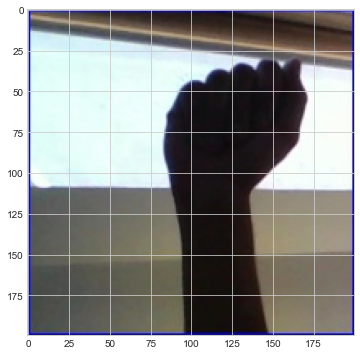

J


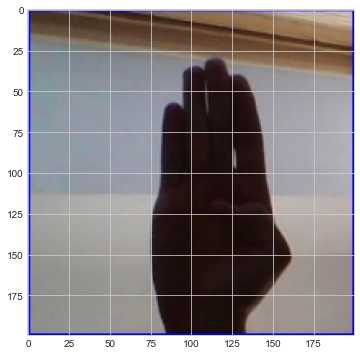

SPACE


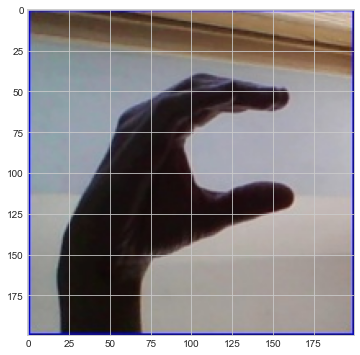

T


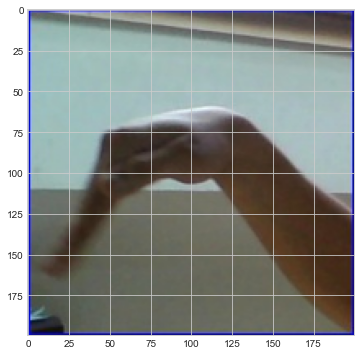

V


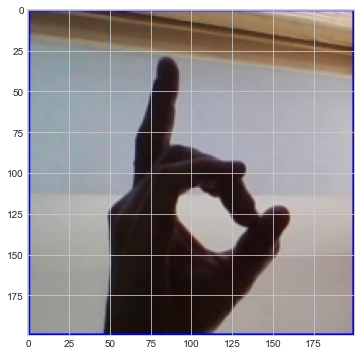

U


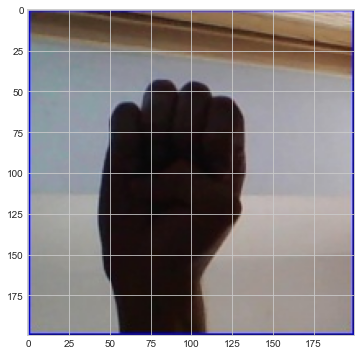

W


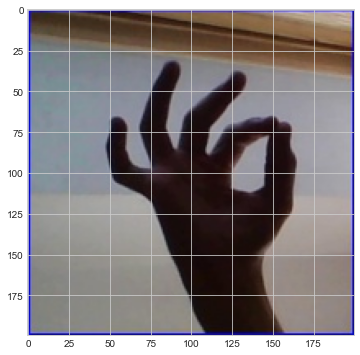

X


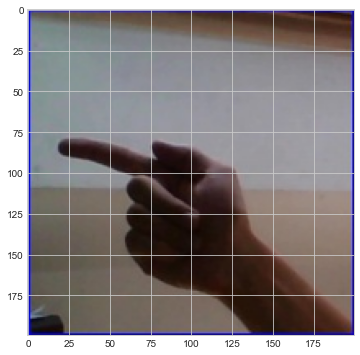

Y


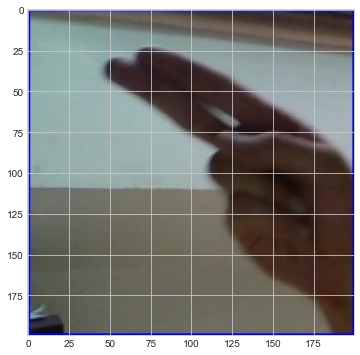

Z


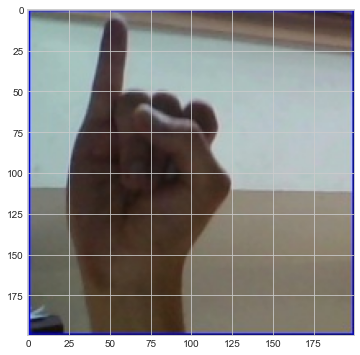

A


In [10]:
PREDICT_DATASET_PATH = Path("Dataset/predict")
predict_img_paths = list(PREDICT_DATASET_PATH.glob("*.jpg"))
# np.random.shuffle(predict_img_paths)

for img_f in predict_img_paths[:10]:
    image = cv2.imread(str(img_f),1)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=[6, 6])
    plt.imshow(image)
    plt.show()
    img = cv2.resize(image, (150, 150))
    img = img / 255
    img = np.expand_dims(img,axis =0)
    Classes = model.predict(img)
    #   print(Classes)
    class_names = ['A', 'B', 'C', 'D','DEL','E','F','G','H','I'] #dictionary lookup is faster
    i = np.argmax(Classes)
    print(class_names[i])



In [27]:
pre_trained_model = tf.keras.applications.MobileNet(
    input_shape=(150, 150, 3),
     include_top=False,
     weights='imagenet',
     pooling='avg')

pre_trained_model.trainable = False

add_model = Sequential()
add_model.add(pre_trained_model)
add_model.add(Dense(128, activation='relu'))
add_model.add(Dense(128, activation='relu'))
add_model.add(Dense(29, activation='softmax'))
        
model = add_model

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 1024)              3228864   
_________________________________________________________________
dense_5 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 29)                3741      
Total params: 3,380,317
Trainable params: 151,453
Non-trainable params: 3,228,864
_________________________________________________________________


In [28]:
model.compile(optimizer = Adam(learning_rate = 0.005), 
              loss =CategoricalCrossentropy(), 
              metrics = ['accuracy'])

In [29]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 25,
            epochs = 10,
            validation_steps = 10,
            verbose = 1)

Epoch 1/10
25/25 [==============================] - 55s 2s/step - loss: 2.5232 - accuracy: 0.3412 - val_loss: 1.7004 - val_accuracy: 0.4900
Epoch 2/10
25/25 [==============================] - 55s 2s/step - loss: 0.8977 - accuracy: 0.7064 - val_loss: 1.1943 - val_accuracy: 0.6040
Epoch 3/10
25/25 [==============================] - 52s 2s/step - loss: 0.5392 - accuracy: 0.8204 - val_loss: 1.0748 - val_accuracy: 0.6940
Epoch 4/10
25/25 [==============================] - 52s 2s/step - loss: 0.3238 - accuracy: 0.8944 - val_loss: 0.8817 - val_accuracy: 0.7280
Epoch 5/10
25/25 [==============================] - 52s 2s/step - loss: 0.3133 - accuracy: 0.8968 - val_loss: 0.8373 - val_accuracy: 0.7320
Epoch 6/10
25/25 [==============================] - 54s 2s/step - loss: 0.2517 - accuracy: 0.9156 - val_loss: 1.3019 - val_accuracy: 0.6980
Epoch 7/10
25/25 [==============================] - 54s 2s/step - loss: 0.2628 - accuracy: 0.9072 - val_loss: 0.9375 - val_accuracy: 0.7400
Epoch 8/10
25/25 [==

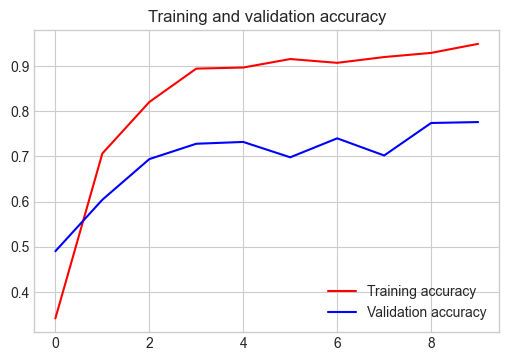

In [30]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.style.use('seaborn-whitegrid')
plt.figure(dpi = 100)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

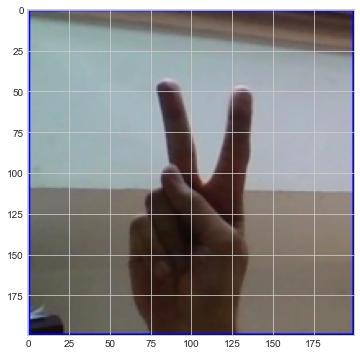

IndexError: list index out of range

In [34]:
PREDICT_DATASET_PATH = Path("Dataset/predict")
predict_img_paths = list(PREDICT_DATASET_PATH.glob("*.jpg"))
# np.random.shuffle(predict_img_paths)

for img_f in predict_img_paths[:10]:
    image = cv2.imread(str(img_f),1)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=[6, 6])
    plt.imshow(image)
    plt.show()
    img = cv2.resize(image, (150, 150))
    img = img / 255
    img = np.expand_dims(img,axis =0)
    Classes = model.predict(img)
    #   print(Classes)
    class_names = ['A', 'B', 'C', 'D','DEL','E','F','G','H','I'] #dictionary lookup is faster
    i = np.argmax(Classes)
    print(class_names[i])


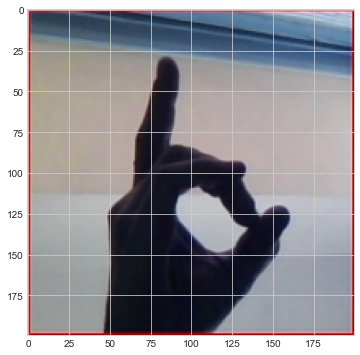

U


In [19]:
path = r"C:\Users\jayak\Documents\Projects\American Sign Language\dataset\predict\D_test.jpg"
image = cv2.imread(str(path),1)
plt.figure(figsize=[6, 6])
plt.imshow(image)
plt.show()
img = cv2.resize(image, (150, 150))
img = img / 255
img = np.expand_dims(img,axis =0)
Classes = model.predict(img)
# print(Classes)
# type(Classes)
# np.shape(Classes)
if Classes[0,0] > 0.4:
    print("A")
elif Classes[0,1] > 0.4:
    print("B") 
elif Classes[0,2] > 0.4:
    print("C") 
elif Classes[0,3] > 0.4:
    print("D") 
elif Classes[0,4] > 0.4:
    print("DEL") 
elif Classes[0,5] > 0.4:
    print("E") 
elif Classes[0,6] > 0.4:
    print("F") 
elif Classes[0,7] > 0.4:
    print("G") 
elif Classes[0,8] > 0.4:
    print("H") 
elif Classes[0,9] > 0.4:
    print("I") 
elif Classes[0,10] > 0.4:
    print("J") 
elif Classes[0,11] > 0.4:
    print("K") 
elif Classes[0,12] > 0.4:
    print("L") 
elif Classes[0,13] > 0.4:
    print("M") 
elif Classes[0,14] > 0.4:
    print("N") 
elif Classes[0,15] > 0.4:
    print("NOTHING") 
elif Classes[0,16] > 0.4:
    print("O") 
elif Classes[0,17] > 0.4:
    print("P") 
elif Classes[0,18] > 0.4:
    print("Q") 
elif Classes[0,19] > 0.4:
    print("R") 
elif Classes[0,20] > 0.4:
    print("S") 
elif Classes[0,21] > 0.4:
    print("SPACE") 
elif Classes[0,22] > 0.4:
    print("T") 
elif Classes[0,23] > 0.4:
    print("U") 
elif Classes[0,24] > 0.4:
    print("V") 
elif Classes[0,25] > 0.4:
    print("W") 
elif Classes[0,26] > 0.4:
    print("X") 
elif Classes[0,27] > 0.4:
    print("Y") 
else:
    print("Z")       



In [24]:
class_names = ['A', 'B', 'C', 'D','DEL','E','F']
i = np.argmax(Classes)
class_names[i]

23